<a href="https://colab.research.google.com/github/aritradey-CS/Admission-Prediction/blob/master/Nov_23_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we manually specify the correlation matrix and then generate data that adheres to this correlation structure.This code will generate a CSV file, custom_data_correlated.csv, with data that follows the specified correlation structure. We can adjust the scale and mean values for each column to meet your specific requirements.

In [1]:
import pandas as pd
import numpy as np

# Define the covariance matrix to achieve the desired correlations
covariance_matrix = np.array([
    [1.0, 0.7, 0.6, 0.3, 0.4, 0.8, 0.5, 0.9],
    [0.6, 1.0, 0.5, 0.2, 0.3, 0.7, 0.3, 0.8],
    [0.3, 0.5, 1.0, 0.4, 0.6, 0.9, 0.4, 0.7],
    [0.5, 0.2, 0.4, 1.0, 0.2, 0.5, 0.2, 0.4],
    [0.2, 0.3, 0.6, 0.2, 1.0, 0.7, 0.3, 0.6],
    [0.7, 0.6, 0.9, 0.5, 0.7, 1.0, 0.6, 0.9],
    [0.5, 0.3, 0.4, 0.2, 0.3, 0.6, 1.0, 0.5],
    [0.9, 0.7, 0.7, 0.6, 0.6, 0.9, 0.5, 1.0]
])

# Generate data with the specified covariance matrix
data = np.random.multivariate_normal(mean=[0] * 8, cov=covariance_matrix, size=2000)

# Create a DataFrame
df = pd.DataFrame(data, columns=[
    'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit'
])

# Adjust the scale and mean as needed for each column
# You may need to adjust the scale and mean to match your specific requirements

# Scale and mean values
scale = [20, 10, 5, 12, 17, 1, 0.5, 0.2]
mean = [320, 100, 3, 3, 3, 3, 0.5, 0.75]

for i, col in enumerate(df.columns):
    df[col] = df[col] * scale[i] + mean[i]

# Save the DataFrame to a CSV file
df.to_csv('custom_data_correlated.csv', index=False)

print("Custom CSV file 'custom_data_correlated.csv' has been created and saved.")


Custom CSV file 'custom_data_correlated.csv' has been created and saved.


<ipython-input-1-c6f8e9ce0312>:17: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean=[0] * 8, cov=covariance_matrix, size=2000)


It's a powerful way to create datasets for various research, testing, and modeling purposes while controlling key statistical properties.I used a different correlation matrix with arbitrary values, and can adjust the scale and mean as needed to match your specific requirements. The generated data will follow the new correlation structure and scale adjustments.

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.568943           0.451088  0.440772   
TOEFL Score         0.568943     1.000000           0.512849  0.203911   
University Rating   0.451088     0.512849           1.000000  0.451529   
SOP                 0.440772     0.203911           0.451529  1.000000   
LOR                 0.296524     0.322530           0.605181  0.275961   
CGPA                0.663808     0.683314           0.911328  0.517921   
Research            0.500745     0.318648           0.455211  0.209346   
Chance of Admit     0.797605     0.782887           0.757091  0.425032   

                        LOR      CGPA  Research  Chance of Admit  
GRE Score          0.296524  0.663808  0.500745         0.797605  
TOEFL Score        0.322530  0.683314  0.318648         0.782887  
University Rating  0.605181  0.911328  0.455211         0.757091  
SOP                0.275961  0.517921  0.209346         0.425032 

<Axes: >

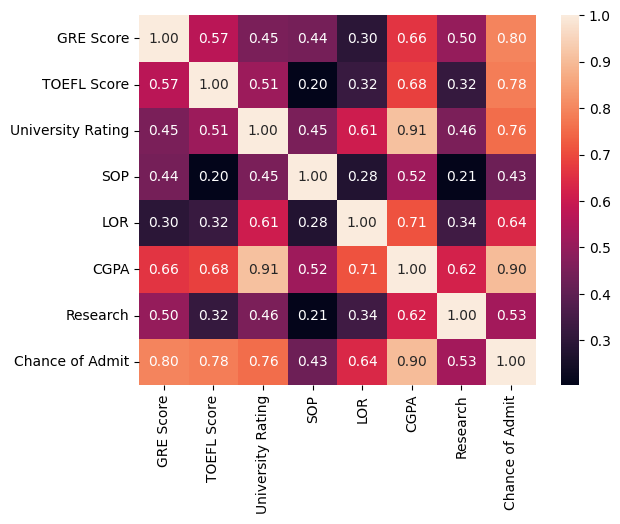

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load the dataset from the CSV file
df = pd.read_csv('custom_data_correlated.csv')
df.head(10)

# Assigning the list of columns from the dataset
numericColumns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

# Creating a correlation matrix
correlationMatrix = df.loc[:, numericColumns].corr()

# Printing the correlation matrix
print(correlationMatrix)

# Displaying the correlation matrix with two decimal places
sns.heatmap(correlationMatrix, annot=True, fmt='.2f')  # Use fmt='.2f' to display two decimal places


1.  Loads a dataset from a CSV file named  
    'custom_data_correlated.csv' using Pandas and displays the first 10 rows of the dataset.

2.  Defines a list of numeric column names to work with.

3.  Calculates a correlation matrix for the specified
    numeric columns. The correlation matrix shows how each numeric column is related to every other numeric column in the dataset.

4.  Prints the correlation matrix to the console, showing
    the pairwise correlations between the columns.

5.  Displays the correlation matrix as a heatmap using
    Seaborn. The sns.heatmap function is used to create the heatmap, and the annot=True parameter adds the correlation values to each cell of the heatmap. The fmt='.2f' parameter is used to format the values to display two decimal places in the heatmap.

In summary, this code loads a dataset, calculates and prints the correlation matrix, and then visualizes the correlation matrix as a heatmap with correlation values rounded to two decimal places. This can be helpful for understanding the relationships between the features in the dataset.




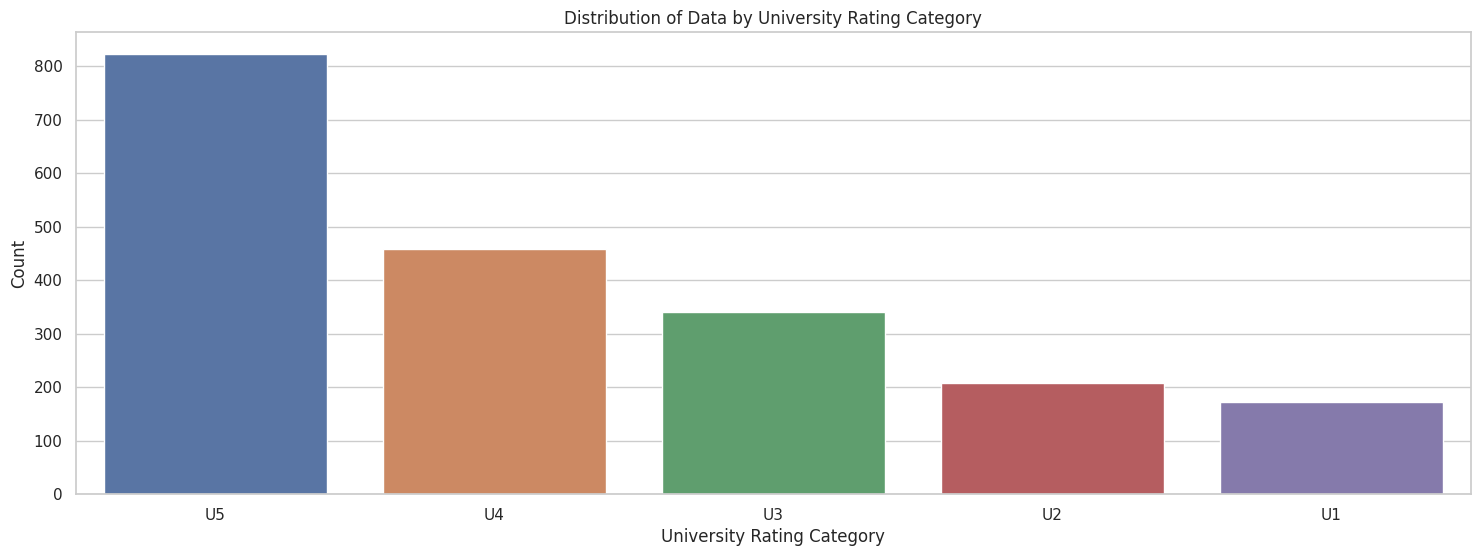

U5: 822 students
U4: 458 students
U3: 341 students
U2: 207 students
U1: 172 students


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('custom_data_correlated.csv')

# Define cutoffs for University Rating categories
cutoffs = [df['University Rating'].min() - 1.1, 2.0, 5.0, 7.5, 10.0, df['University Rating'].max() + 0.1]


# Create a new column 'University Rating Category' based on cutoffs
df['University Rating Category'] = pd.cut(df['University Rating'], bins=cutoffs, labels=['U5', 'U4', 'U3', 'U2', 'U1'])

# Count the number of data points in each category
category_counts = df['University Rating Category'].value_counts().sort_index()

# Create a bar plot to visualize the distribution of data by University Rating
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Data by University Rating Category')
plt.xlabel('University Rating Category')
plt.ylabel('Count')
plt.show()

# Print the count of students in each subgroup
for category, count in zip(category_counts.index, category_counts.values):
    print(f"{category}: {count} students")


The provided code loads a dataset from a CSV file and performs the following tasks:

1. It categorizes the "University Rating" feature into five categories (U5, U4, U3, U2, U1) based on specified cutoff values.
2. It counts the number of data points in each category.
3. It creates a bar plot to visualize the distribution of data across these University Rating categories.
4. It prints the count of students in each of the five categories.

This code is used to explore and visualize how the data is distributed among different University Rating categories.